In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-11-08 21:35:51.076508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/changlu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow_datasets as tfds

/Users/changlu/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
(train,test)= tfds.load('mnist',
                             split = ['train','test'])

In [6]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [7]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [9]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = load_dataset(10000,10000)

X_train: (10000, 784)
y_train: (10000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2789945556674227
Max: 99.99499987502128


/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##Optimizing at the initialization stage

In [11]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [12]:
from tensorflow.keras import layers

In [13]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [14]:
model_zeros = simple_model(init, activate)

In [15]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 1s 142ms/step - loss: 2.3026 - accuracy: 0.1084 - val_loss: 2.3026 - val_accuracy: 0.1130
Epoch 2/10
4/4 [==============================] - 0s 30ms/step - loss: 2.3026 - accuracy: 0.1095 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/10
4/4 [==============================] - 0s 31ms/step - loss: 2.3026 - accuracy: 0.1050 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 4/10
4/4 [==============================] - 0s 31ms/step - loss: 2.3025 - accuracy: 0.1050 - val_loss: 2.3026 - val_accuracy: 0.1130
Epoch 5/10
4/4 [==============================] - 0s 31ms/step - loss: 2.3025 - accuracy: 0.1095 - val_loss: 2.3026 - val_accuracy: 0.1130
Epoch 6/10
4/4 [==============================] - 0s 33ms/step - loss: 2.3025 - accuracy: 0.1095 - val_loss: 2.3025 - val_accuracy: 0.1130
Epoch 7/10
4/4 [==============================] - 0s 33ms/step - loss: 2.3025 - accuracy: 0.1095 - val_loss: 2.3025 - val_accuracy: 0.1130
Epoch 8/10
4/4 [==========

In [16]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/changlu/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


4/4 [==============================] - 1s 147ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.1034
Epoch 2/10
4/4 [==============================] - 0s 32ms/step - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3026 - val_accuracy: 0.1195
Epoch 3/10
4/4 [==============================] - 0s 34ms/step - loss: 2.3023 - accuracy: 0.1249 - val_loss: 2.3025 - val_accuracy: 0.1266
Epoch 4/10
4/4 [==============================] - 0s 33ms/step - loss: 2.3022 - accuracy: 0.1366 - val_loss: 2.3024 - val_accuracy: 0.1360
Epoch 5/10
4/4 [==============================] - 0s 37ms/step - loss: 2.3021 - accuracy: 0.1423 - val_loss: 2.3024 - val_accuracy: 0.1337
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 2.3020 - accuracy: 0.1442 - val_loss: 2.3023 - val_accuracy: 0.1368
Epoch 7/10
4/4 [==============================] - 0s 33ms/step - loss: 2.3020 - accuracy: 0.1444 - val_loss: 2.3022 - val_accuracy: 0.1409
Epoch 8/10
4/4 [=====================

In [17]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))


Epoch 1/10


/Users/changlu/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


4/4 [==============================] - 1s 134ms/step - loss: 2.3510 - accuracy: 0.1062 - val_loss: 2.3645 - val_accuracy: 0.0993
Epoch 2/10
4/4 [==============================] - 0s 31ms/step - loss: 2.3413 - accuracy: 0.1083 - val_loss: 2.3554 - val_accuracy: 0.1025
Epoch 3/10
4/4 [==============================] - 0s 36ms/step - loss: 2.3328 - accuracy: 0.1116 - val_loss: 2.3464 - val_accuracy: 0.1062
Epoch 4/10
4/4 [==============================] - 0s 35ms/step - loss: 2.3244 - accuracy: 0.1154 - val_loss: 2.3379 - val_accuracy: 0.1118
Epoch 5/10
4/4 [==============================] - 0s 36ms/step - loss: 2.3165 - accuracy: 0.1191 - val_loss: 2.3304 - val_accuracy: 0.1146
Epoch 6/10
4/4 [==============================] - 0s 39ms/step - loss: 2.3094 - accuracy: 0.1236 - val_loss: 2.3232 - val_accuracy: 0.1189
Epoch 7/10
4/4 [==============================] - 0s 36ms/step - loss: 2.3026 - accuracy: 0.1286 - val_loss: 2.3164 - val_accuracy: 0.1247
Epoch 8/10
4/4 [=====================

In [18]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Users/changlu/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 131ms/step - loss: 3.7768 - accuracy: 0.1038 - val_loss: 2.9480 - val_accuracy: 0.1210
Epoch 2/10
4/4 [==============================] - 0s 37ms/step - loss: 2.7320 - accuracy: 0.1329 - val_loss: 2.6099 - val_accuracy: 0.1701
Epoch 3/10
4/4 [==============================] - 0s 35ms/step - loss: 2.4722 - accuracy: 0.1743 - val_loss: 2.4306 - val_accuracy: 0.2144
Epoch 4/10
4/4 [==============================] - 0s 38ms/step - loss: 2.3121 - accuracy: 0.2155 - val_loss: 2.2952 - val_accuracy: 0.2524
Epoch 5/10
4/4 [==============================] - 0s 37ms/step - loss: 2.1862 - accuracy: 0.2519 - val_loss: 2.1894 - val_accuracy: 0.2954
Epoch 6/10
4/4 [==============================] - 0s 38ms/step - loss: 2.0856 - accuracy: 0.2882 - val_loss: 2.0996 - val_accuracy: 0.3297
Epoch 7/10
4/4 [==============================] - 0s 36ms/step - loss: 2.0010 - accuracy: 0.3246 - val_loss: 2.0184 - val_accuracy: 0.3636
Epoch 8/10
4/4 [==========

Text(0, 0.5, 'Validation Accuracy')

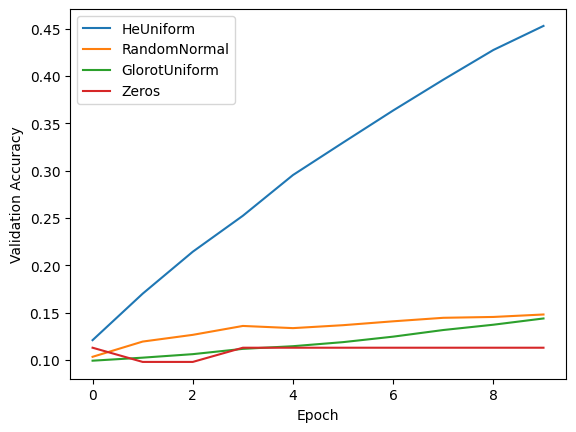

In [19]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [20]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [21]:
simple_model_bn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [22]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
4/4 [==============================] - 2s 239ms/step - loss: 2.7006 - accuracy: 0.1358 - val_loss: 2.3005 - val_accuracy: 0.1480
Epoch 2/10
4/4 [==============================] - 0s 43ms/step - loss: 2.2114 - accuracy: 0.2889 - val_loss: 2.2989 - val_accuracy: 0.2271
Epoch 3/10
4/4 [==============================] - 0s 49ms/step - loss: 1.8981 - accuracy: 0.3817 - val_loss: 2.2972 - val_accuracy: 0.2906
Epoch 4/10
4/4 [==============================] - 0s 46ms/step - loss: 1.6790 - accuracy: 0.4484 - val_loss: 2.2955 - val_accuracy: 0.3208
Epoch 5/10
4/4 [==============================] - 0s 47ms/step - loss: 1.5269 - accuracy: 0.4995 - val_loss: 2.2936 - val_accuracy: 0.3392
Epoch 6/10
4/4 [==============================] - 0s 46ms/step - loss: 1.4073 - accuracy: 0.5394 - val_loss: 2.2917 - val_accuracy: 0.3405
Epoch 7/10
4/4 [==============================] - 0s 48ms/step - loss: 1.3149 - accuracy: 0.5779 - val_loss: 2.2895 - val_accuracy: 0.3504
Epoch 8/10
4/4 [==========

In [23]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/changlu/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 2s 163ms/step - loss: 2.0330 - accuracy: 0.3474 - val_loss: 2.3015 - val_accuracy: 0.1546
Epoch 2/10
4/4 [==============================] - 0s 48ms/step - loss: 1.1259 - accuracy: 0.6759 - val_loss: 2.3003 - val_accuracy: 0.1043
Epoch 3/10
4/4 [==============================] - 0s 49ms/step - loss: 0.8280 - accuracy: 0.7753 - val_loss: 2.2992 - val_accuracy: 0.1053
Epoch 4/10
4/4 [==============================] - 0s 47ms/step - loss: 0.6753 - accuracy: 0.8197 - val_loss: 2.2983 - val_accuracy: 0.1024
Epoch 5/10
4/4 [==============================] - 0s 47ms/step - loss: 0.5807 - accuracy: 0.8465 - val_loss: 2.2975 - val_accuracy: 0.1028
Epoch 6/10
4/4 [==============================] - 0s 46ms/step - loss: 0.5156 - accuracy: 0.8657 - val_loss: 2.2965 - val_accuracy: 0.1029
Epoch 7/10
4/4 [==============================] - 0s 48ms/step - loss: 0.4704 - accuracy: 0.8767 - val_loss: 2.2955 - val_accuracy: 0.1023
Epoch 8/10
4/4 [==========

In [24]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
4/4 [==============================] - 3s 166ms/step - loss: 2.0841 - accuracy: 0.3259 - val_loss: 2.2893 - val_accuracy: 0.1810
Epoch 2/10
4/4 [==============================] - 0s 55ms/step - loss: 0.8617 - accuracy: 0.7288 - val_loss: 2.2406 - val_accuracy: 0.2813
Epoch 3/10
4/4 [==============================] - 0s 48ms/step - loss: 0.5939 - accuracy: 0.8180 - val_loss: 2.1860 - val_accuracy: 0.3889
Epoch 4/10
4/4 [==============================] - 0s 47ms/step - loss: 0.4428 - accuracy: 0.8682 - val_loss: 2.1375 - val_accuracy: 0.3948
Epoch 5/10
4/4 [==============================] - 0s 51ms/step - loss: 0.3441 - accuracy: 0.9020 - val_loss: 2.0952 - val_accuracy: 0.4672
Epoch 6/10
4/4 [==============================] - 0s 48ms/step - loss: 0.2797 - accuracy: 0.9172 - val_loss: 2.0576 - val_accuracy: 0.4977
Epoch 7/10
4/4 [==============================] - 0s 48ms/step - loss: 0.2394 - accuracy: 0.9290 - val_loss: 2.0297 - val_accuracy: 0.4645
Epoch 8/10
4/4 [==========

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/10
4/4 [==============================] - 3s 201ms/step - loss: 2.1370 - accuracy: 0.2961 - val_loss: 2.2970 - val_accuracy: 0.1176
Epoch 2/10
4/4 [==============================] - 0s 60ms/step - loss: 0.9356 - accuracy: 0.7107 - val_loss: 2.2657 - val_accuracy: 0.1436
Epoch 3/10
4/4 [==============================] - 0s 50ms/step - loss: 0.6124 - accuracy: 0.8275 - val_loss: 2.2105 - val_accuracy: 0.2369
Epoch 4/10
4/4 [==============================] - 0s 52ms/step - loss: 0.4562 - accuracy: 0.8665 - val_loss: 2.1461 - val_accuracy: 0.3788
Epoch 5/10
4/4 [==============================] - 0s 51ms/step - loss: 0.3594 - accuracy: 0.8914 - val_loss: 2.0849 - val_accuracy: 0.4472
Epoch 6/10
4/4 [==============================] - 0s 51ms/step - loss: 0.3022 - accuracy: 0.9113 - val_loss: 2.0270 - val_accuracy: 0.4802
Epoch 7/10
4/4 [==============================] - 0s 51ms/step - loss: 0.2549 - accuracy: 0.9278 - val_loss: 1.9759 - val_accuracy: 0.5007
Epoch 8/10
4/4 [==========

In [27]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 16.
Epoch 26: early stopping
Train Acc: 0.9904999732971191 Test Acc: 0.9467999935150146


In [28]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping
Train Acc: 0.9779000282287598 Test Acc: 0.935699999332428
